In [166]:
import pandas as pd


In [167]:
df=pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [168]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [169]:
df.shape

(10000, 14)

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [171]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [172]:
df=df.drop(['RowNumber', 'CustomerId', 'Surname',],axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [173]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [174]:
geography=pd.get_dummies(df['Geography'],drop_first=True)
geography

,Germany,Spain
0,False,False
1,False,True
2,False,False
3,False,False
4,False,True
...,...,...
9995,False,False
9996,False,False
9997,False,False
9998,True,False


In [175]:
gender=pd.get_dummies(df['Gender'],drop_first=True)
gender

,Male
0,False
1,False
2,False
3,False
4,False
...,...
9995,True
9996,True
9997,False
9998,True


In [176]:
df=df.drop(['Gender','Geography'],axis=1)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0


In [177]:
df=pd.concat([df,geography,gender],axis=1)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [178]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [179]:
import seaborn as sns

<Axes: xlabel='Exited', ylabel='count'>

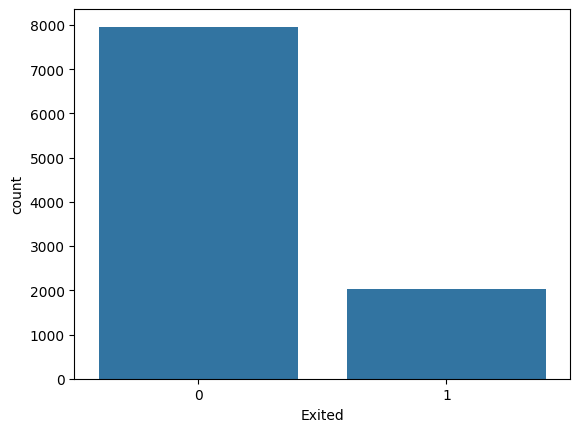

In [180]:
sns.countplot(x=df['Exited'])

 #by observing the graph,we can assume the graph is imbalanced

In [181]:
X=df.drop('Exited',axis=1)
y=df['Exited']
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [182]:
#handling imbalanced data with smote(Synthetic Minority Over-sampling Technique)

In [83]:
!pip install imbalanced-learn

   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/258.3 kB ? eta -:--:--
   --------- ----------------------------- 61.4/258.3 kB 656.4 kB/s eta 0:00:01
   ------------------ ------------------- 122.9/258.3 kB 798.9 kB/s eta 0:00:01
   -------------------------------------- - 245.8/258.3 kB 1.3 MB/s eta 0:00:01
   -------------------------------------- 258.3/258.3 kB 992.3 kB/s eta 0:00:00


In [183]:
from imblearn.over_sampling import SMOTE
X_res,y_res=SMOTE().fit_resample(X,y)

In [184]:
y_res.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [185]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.2,random_state=42)

In [186]:
#stratify=y ensures that the split will maintain the same proportion of classes in the training and testing sets as in the original dataset, which is important for imbalanced datasets.

In [187]:
import warnings
warnings.filterwarnings("ignore")


In [188]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [189]:
X_train

array([[ 0.265493  , -0.6022731 ,  0.0780257 , ...,  1.32708767,
        -0.6358624 ,  0.81010262],
       [ 1.09117675,  0.10140067, -1.39191509, ..., -0.75352972,
        -0.6358624 ,  0.81010262],
       [-0.39722685,  0.80507443, -0.28945949, ..., -0.75352972,
         1.5726673 , -1.23441152],
       ...,
       [ 0.20030745,  0.20192549,  1.1804813 , ..., -0.75352972,
        -0.6358624 ,  0.81010262],
       [-0.36463407,  0.40297514,  0.0780257 , ..., -0.75352972,
         1.5726673 ,  0.81010262],
       [ 0.52623524,  1.00612408, -1.39191509, ...,  1.32708767,
        -0.6358624 ,  0.81010262]])

## Logistic Regression

In [190]:
from sklearn.linear_model import LogisticRegression

In [191]:
model_log=LogisticRegression()

In [192]:
model_log.fit(X_train,y_train)

LogisticRegression()

In [193]:
y_pred1=model_log.predict(X_test)

In [194]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [195]:
accuracy_score(y_test,y_pred1)

0.7768361581920904

In [196]:
confusion_matrix(y_test,y_pred1)

array([[1273,  360],
       [ 351, 1202]], dtype=int64)

In [197]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [198]:
precision_score(y_pred1,y_test)

0.7739858338699291

In [199]:
recall_score(y_pred1,y_test)

0.7695262483994878

In [200]:
f1_score(y_pred1,y_test)

0.7717495987158909

# SVC

In [201]:
from sklearn import svm


In [202]:
model_svm=svm.SVC()

In [203]:
model_svm.fit(X_train,y_train)

SVC()

In [204]:
y_pred2=model_svm.predict(X_test)

In [205]:
accuracy_score(y_test,y_pred2)

0.842435655994978

In [206]:
precision_score(y_test,y_pred2)

0.8410123296560675

In [207]:
f1_score(y_test,y_pred2)

0.8377504848093084

## KNeighbors classifier

In [208]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [209]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [210]:
y_pred3=knn.predict(X_test)

In [211]:
accuracy_score(y_test,y_pred3)

0.8204645323289391

In [212]:
precision_score(y_test,y_pred3)

0.8044692737430168

## Decison Tree Classifier

In [213]:
from sklearn.tree import DecisionTreeClassifier

In [214]:
dt=DecisionTreeClassifier()

In [215]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [216]:
y_pred4=dt.predict(X_test)

In [217]:
accuracy_score(y_test,y_pred4)

0.7900188323917138

In [218]:
precision_score(y_test,y_pred4)

0.7688564476885644

## Random Forest Classifier

In [219]:
from sklearn.ensemble import RandomForestClassifier

In [220]:
rf=RandomForestClassifier()

In [221]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [222]:
y_pred5=rf.predict(X_test)

In [223]:
accuracy_score(y_test,y_pred5)

0.8713119899560577

In [224]:
precision_score(y_test,y_pred5)

0.8713450292397661

## Gradient Boosting Classifier

In [225]:
from sklearn.ensemble import GradientBoostingClassifier

In [226]:
gbc=GradientBoostingClassifier()

In [227]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [228]:
y_pred6=gbc.predict(X_test)

In [229]:
accuracy_score(y_test,y_pred6)

0.8455743879472694

In [230]:
final_data=pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],
                         'ACC':[accuracy_score(y_test,y_pred1),
                                accuracy_score(y_test,y_pred2),
                                accuracy_score(y_test,y_pred3),
                                accuracy_score(y_test,y_pred4),
                                accuracy_score(y_test,y_pred5),
                                accuracy_score(y_test,y_pred6)]})

In [231]:
final_data

,Models,ACC
0,LR,0.776836
1,SVC,0.842436
2,KNN,0.820465
3,DT,0.790019
4,RF,0.871312
5,GBC,0.845574


In [232]:
import seaborn as sns

<Axes: xlabel='Models', ylabel='ACC'>

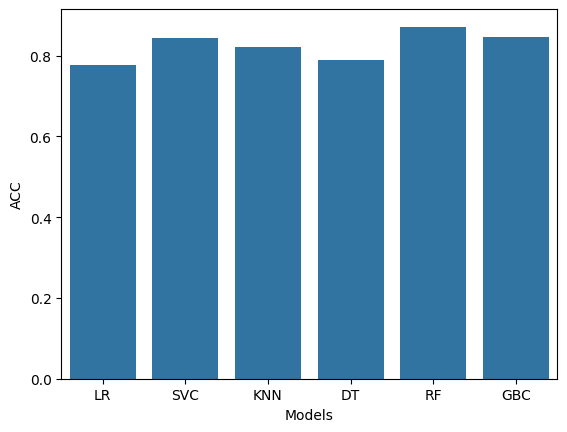

In [233]:
sns.barplot(x='Models',y='ACC',data=final_data)

In [234]:
X_res=sc.fit_transform(X_res)

In [235]:
rf.fit(X_res,y_res)

RandomForestClassifier()

In [236]:
import joblib

In [237]:
joblib.dump(rf,'churn_predict_model')

['churn_predict_model']

In [238]:
model=joblib.load('churn_predict_model')

In [239]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Germany', 'Spain',
       'Male'],
      dtype='object')

In [242]:
model.predict([[600,32,2,0.0,0,0,0,103143.33,0,0,0]])

array([1], dtype=int64)